In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
color = sns.color_palette()

import random

In [2]:
aisles = pd.read_csv("aisles.csv")
departments = pd.read_csv("departments.csv")
orders = pd.read_csv("orders.csv")
prior = pd.read_csv("order_products__prior.csv")
train = pd.read_csv("order_products__train.csv")
products = pd.read_csv("products.csv")

# Getting familiar with the data and checking for data quality.

Once we have uploaded all the files, lets get familiar with all of them. First, lets follow the order above and explore each file individually or in groups (if necessary). For better understanding it is custom to display first rows of the file.

In [5]:
print(f"Total number of aisles is: {aisles.shape[0]}")
aisles.head(3)

Total number of aisles is: 134


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars


In [6]:
print(f"Total number of departments is: {departments.shape[0]}")
departments.head(3)

Total number of departments is: 21


,department_id,department
0,1,frozen
1,2,other
2,3,bakery


As we can see from 2 data frames above, each of them contain simple data (self-explanatory) for all available aisles and departments Instacart customers can select from. Each row in both data frames represent unique aisle/department with it's unique `ID` and `NAME`. For now, we cannot retrieve any meaningful information except the one mentioned in previous sentence. However, before we move on, lets conduct a basic check for duplicates and missing values:

In [7]:
print(f"Aisles data frame has {aisles.duplicated().sum()} duplicated values.")
print(f"Aisles data frame has {aisles.isna().sum()[0]} missing ID values and {aisles.isna().sum()[1]} missing NAME values.")
print(f"Departments data frame has {departments.duplicated().sum()} duplicated values.")
print(f"Departments data frame has {departments.isna().sum()[0]} missing ID values and {departments.isna().sum()[1]} missing NAME values.")

Aisles data frame has 0 duplicated values.
Aisles data frame has 0 missing ID values and 0 missing NAME values.
Departments data frame has 0 duplicated values.
Departments data frame has 0 missing ID values and 0 missing NAME values.


---

In [8]:
orders.head(3)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0


It appears that for a complete information orders, prior, train and products data frames should be explored together. Orders contain information on each user:
- their `order_id`s and which data frame (prior or train) contains further information about that particular order
- `order_number` column represents chronological order of purchases for each user. This will enable us to track the sequence of purchases.
- `order_dow` and `order_hour_of_day` represent order's day of the week and hour of the day, respectively
- and, finally, `days_since_prior_order` tell us the number of days that has passed since the previous order for a given customer. 

Seeing the NaN in the last column of the first row already indicates that this data frame has missing values. Lets see how many and what do they mean:

In [9]:
orders.isna().sum()

order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

In [10]:
# check how many users in the data set
orders['user_id'].unique().shape

(206209,)

It seems like the only column with missing values is `days_since_prior_order` and the number of NaNs perfectly match the number of unique users. Due to the nature of the information represented by this column, missing values occurring for each user on their first order suggests no information about when was previous order made by the user. We can replace all NaNs with zeros (0 days since last order) in order to keep the data clean.

In [11]:
# fill NaNs with zeros of proper format that matches the entire column: float
orders = orders.fillna(0.0)

In [12]:
orders.head(3)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,0.0
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0


---

In [13]:
prior.head(3)

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0


In [14]:
train.head(3)

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0


Prior and Train data frames both contain same type of information: which products (their IDs) were included in the basket for a given order, a chronological order of adding the items and whether the item is reordered or not. Meaning, if 'yes', then that user has purchased that item at least once before. For more details about the individual items withing orders we refer to Products data frame. In contains product name (for respective ID), which aisle the product is located and in which department.

In [15]:
products.head(3)

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7


In [16]:
print(f"Orders data frame has {orders.duplicated().sum()} duplicated values.")
print(f"Prior data frame has {prior.duplicated().sum()} duplicated values.")
print(f"Train data frame has {train.duplicated().sum()} duplicated values.")
print(f"Products data frame has {products.duplicated().sum()} duplicated values.")

Orders data frame has 0 duplicated values.
Prior data frame has 0 duplicated values.
Train data frame has 0 duplicated values.
Products data frame has 0 duplicated values.


In [17]:
orders.isna().sum()

order_id                  0
user_id                   0
eval_set                  0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64

In [18]:
prior.isna().sum()

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

In [19]:
train.isna().sum()

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

In [20]:
products.isna().sum()

product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64

Luckily, none of these 5 data frames has any duplicated or missing values. That is a massive time savings since there is no need for filtering data, imputing missing values or deleting rows/columns that are deemed 'useless' due to missing elements.

Finally, as a last check, lets make sure that all columns in all data frames have proper data types (IDs are integers, NAMEs are strings etc.). This is a good practice in order to avoid any error in the future such as aggregating over non-numeric values etc.:

In [21]:
aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [22]:
departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [23]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   eval_set                object 
 3   order_number            int64  
 4   order_dow               int64  
 5   order_hour_of_day       int64  
 6   days_since_prior_order  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 182.7+ MB


In [24]:
prior.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 989.8 MB


In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384617 entries, 0 to 1384616
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           1384617 non-null  int64
 1   product_id         1384617 non-null  int64
 2   add_to_cart_order  1384617 non-null  int64
 3   reordered          1384617 non-null  int64
dtypes: int64(4)
memory usage: 42.3 MB


In [26]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49688 non-null  int64 
 1   product_name   49688 non-null  object
 2   aisle_id       49688 non-null  int64 
 3   department_id  49688 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


# EDA 

All clear for the entire data set. Lets jump into analysis. I will follow same order as before: data frame in order they were uploaded and, now, by columns of each data frame.

Aisles and Departments are useful only in combination with products. As we discovered earlier, there are 21 departments that contain 134 aisles. Now lets see how many unique products are offered by Instacart.

In [27]:
print(f"Instacart offers {products.shape[0]} unique products to their customers")

Instacart offers 49688 unique products to their customers


Now lets start off easy and see:
- how many aisles does each department contain
- how many products does each department have
- how many products is withing each aisle

For this, we have to properly combine all the data frames in order to have aisles and department names.

In [29]:
# how many aisles does each department contain
store_df = products.merge(aisles, how = 'left', on = 'aisle_id')
store_df = store_df.merge(departments, how = 'left', on = 'department_id')
store_df = store_df[['product_id', 'product_name','department_id', 'department', 'aisle_id', 'aisle', ]]
store_df.head()

,product_id,product_name,department_id,department,aisle_id,aisle
0,1,Chocolate Sandwich Cookies,19,snacks,61,cookies cakes
1,2,All-Seasons Salt,13,pantry,104,spices seasonings
2,3,Robust Golden Unsweetened Oolong Tea,7,beverages,94,tea
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,1,frozen,38,frozen meals
4,5,Green Chile Anytime Sauce,13,pantry,5,marinades meat preparation


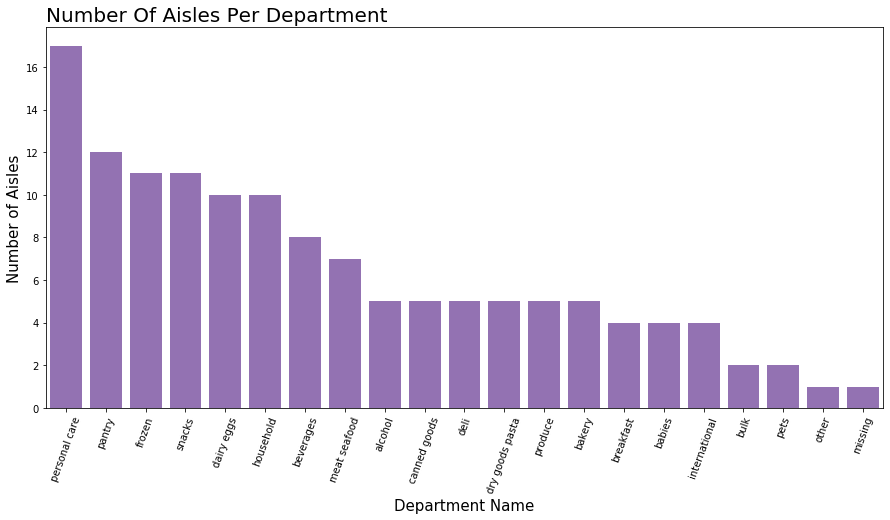

In [32]:
bar_chart1 = store_df.groupby('department')['aisle'].nunique().to_frame().reset_index().sort_values(by='aisle', ascending = False)
bar_chart1.columns = ['department', 'number_of_aisles']


plt.figure(figsize = (15,7))

sns.barplot(bar_chart1['department'], 
        bar_chart1['number_of_aisles'], color = random.choice(color))
plt.xlabel('Department Name', fontsize = 15)
plt.ylabel('Number of Aisles', fontsize = 15)
plt.title('Number Of Aisles Per Department', loc = 'left', fontsize = 20)
plt.xticks(rotation = 70)

plt.show()

It appears that the largest department is Personal Care, followed by Pantry, Frozen food and Snacks. It also appears that we don't have as clean data as we previously assumed. There is a department called 'missing' which is not ideal, however, for prediction purposes I think it's best to keep that department.

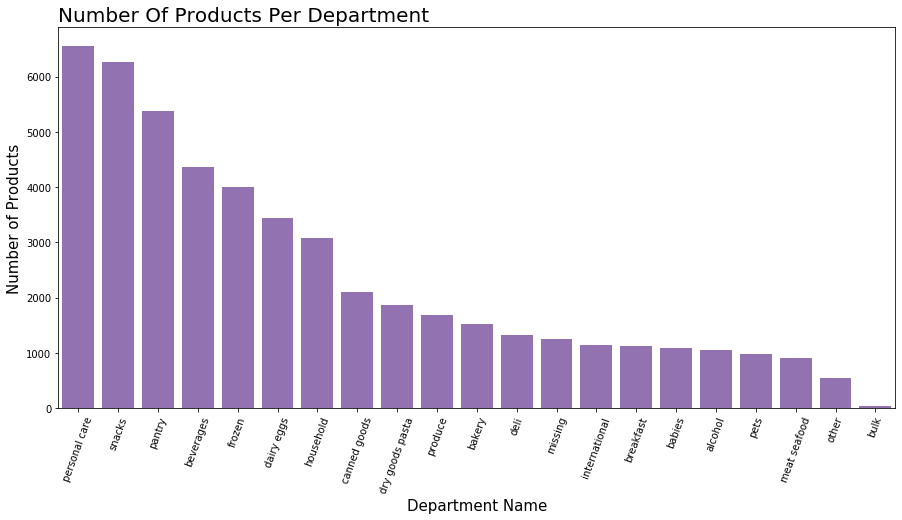

In [33]:
bar_chart2 = store_df.groupby('department')['product_name'].nunique().to_frame().reset_index().sort_values(by='product_name', ascending = False)
bar_chart2.columns = ['department', 'number_of_products']


plt.figure(figsize = (15,7))

sns.barplot(bar_chart2['department'], 
        bar_chart2['number_of_products'], color = random.choice(color))
plt.xlabel('Department Name', fontsize = 15)
plt.ylabel('Number of Products', fontsize = 15)
plt.title('Number Of Products Per Department', loc = 'left', fontsize = 20)
plt.xticks(rotation = 70)

plt.show()

Personal Care is also a leading department by the number of products in it, however, the remaining order has changed. Also, keeping 'missing' department was a reasonable decision since it contains a substantial amount of products in it. Lets have a look what kind of products that department contains and, hopefully we will be able to properly define its name.

In [ ]:
#store_df.loc[store_df['department'] == 'missing', 'product_name'].values.tolist()

It looks like products within that department are random and no clear pattern has emerged. However, after skimming through the list and considering that it has only one aisle and has more products than 'other' department (see below), I think it is appropriate to rename it to 'specialty'. 

_NOTE:_ I will rename the department here and not in the very beginning to properly reflect the process and logic behind the decision. Also, there is an aisle name 'missing' as well and directly corresponds to 'missing' department; I will rename it to 'specialty products' as well. I will, however, reinstantiate the store_df in order to reflect the change.

In [34]:
bar_chart1.loc[bar_chart1['department'] == 'missing', :]

,department,number_of_aisles
14,missing,1


In [35]:
bar_chart2.loc[(bar_chart2['department'] == 'missing')|(bar_chart2['department'] == 'other'), :]

,department,number_of_products
14,missing,1258
15,other,548


In [36]:
departments['department'] = departments['department'].replace(['missing'], 'specialty')

aisles['aisle'] = aisles['aisle'].replace(['missing'], 'specialty products')

# how many aisles does each department contain
store_df = products.merge(aisles, how = 'left', on = 'aisle_id')
store_df = store_df.merge(departments, how = 'left', on = 'department_id')
store_df = store_df[['product_id', 'product_name','department_id', 'department', 'aisle_id', 'aisle', ]]
store_df.head()

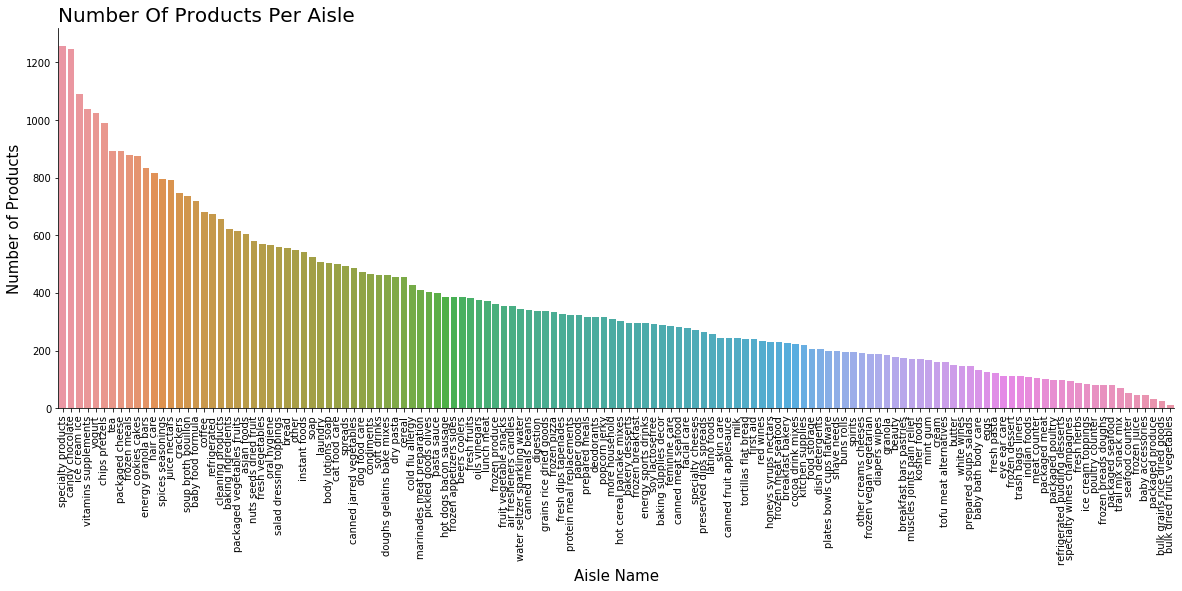

In [38]:
bar_chart3 = store_df.groupby('aisle')['product_name'].nunique().to_frame().reset_index().sort_values(by='product_name', ascending = False)
bar_chart3.columns = ['aisle', 'number_of_products']


plt.figure(figsize = (20,7))
sns.barplot(bar_chart3['aisle'], 
        bar_chart3['number_of_products'])
plt.xlabel('Aisle Name', fontsize = 15)
plt.ylabel('Number of Products', fontsize = 15)
plt.title('Number Of Products Per Aisle', loc = 'left', fontsize = 20)
plt.xticks(rotation = 'vertical')
sns.despine()

plt.show()

It seems that previously renamed aisle represents the largest number of products for Instacart and bulk products are in the right tale of the distribution. Later in this notebook we will look into how popular these specialty products are - sure, they can dominate the assortment, but it is no good if nobody buys them?! 


Next, we will start exploring the remaining data frames as a group and, again, let's start easy:

Orders data frame contains information about over 3.3 million grocery orders from Instacart made by 206209 users. So let's extract some insights about overall orders and per customer basis.


In [40]:
print(f"In this dataset, users ordered {np.round(np.mean(orders.groupby('user_id')['order_id'].count().values),2)} times from Instacart, on average!")


In this dataset, users ordered 16.59 times from Instacart, on average!


But we know that when one person is broke and another has a million dollars, on average, they both have half a million in a bank. In order to avoid being mislead by this number, lets take a look on how number of orders are distributed across this dataset.

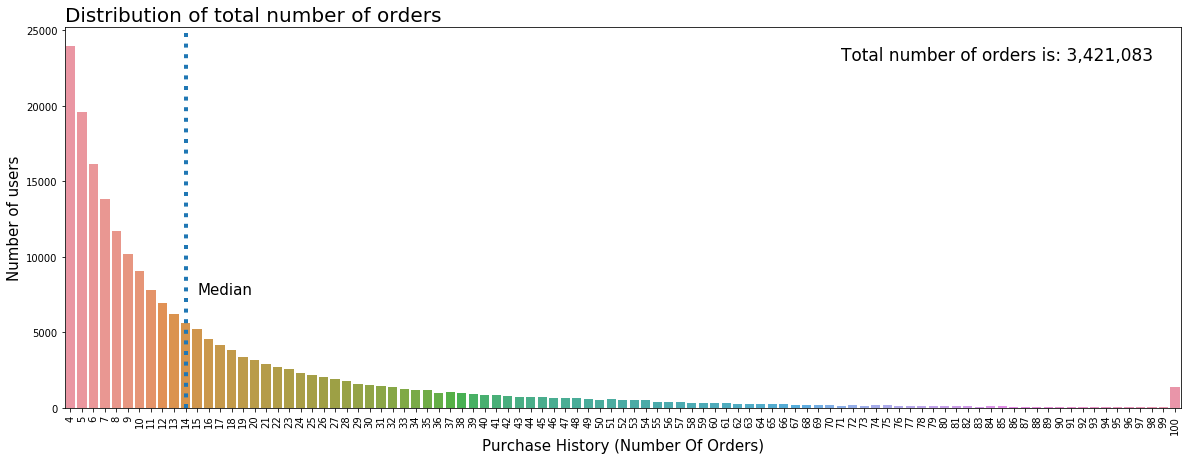

In [41]:
chart1 = orders.groupby('user_id')['order_number'].aggregate('max').to_frame().reset_index()
chart1 = chart1['order_number'].value_counts()
human_readable_number = "{:,}".format(orders.shape[0])

plt.figure(figsize = (20,7))
sns.barplot(chart1.index, chart1.values)
plt.xlabel('Purchase History (Number Of Orders)', fontsize = 15)
plt.ylabel('Number of users', fontsize = 15)
plt.title('Distribution of total number of orders', fontsize = 20, loc = 'left')
plt.text(x = 67, y = 23000, s = f"Total number of orders is: {human_readable_number}", fontsize = 17)
plt.xticks(rotation = 'vertical')
plt.axvline(np.round(np.median(orders.groupby('user_id')['order_id'].count().values),2),
            linestyle = 'dotted',
           linewidth = 4)
plt.text(x = 11, y = 7500, s = 'Median', fontsize = 15)

plt.show()

As you can see on the graph above, out of over 3,4 million orders and 206 thousand members in this dataset, vast majority of users have used the service under 10 times (min = 4, max = 100) with median being at 14 orders. This means that we have a highly imbalanced data with respect to purchase history sizes.

*** make sure to talk about a 100th bar***artificial cutoff point when making a dataset

In [42]:
orders['eval_set'].value_counts()

prior    3214874
train     131209
test       75000
Name: eval_set, dtype: int64

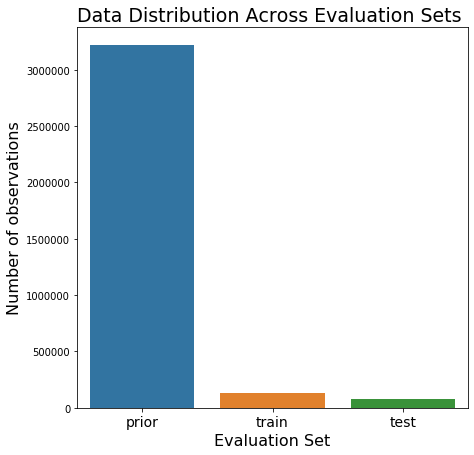

In [43]:
plt.figure(figsize = (7,7))

sns.barplot(orders['eval_set'].value_counts().index, orders['eval_set'].value_counts().values)
plt.xticks(fontsize = 14)
plt.xlabel('Evaluation Set', fontsize = 16)
plt.ylabel('Number of observations', fontsize = 16)
plt.title('Data Distribution Across Evaluation Sets', fontsize = 19, loc = 'left')

plt.show()

Instacart posted the dataset and announced a competition on market basket analysis in 2017. For this purpose they have assigned 'prior' orders towards purchase history, 'train' orders for model training in order to predict reordered items for the 'test' orders. However, details on 'train' set is not provided, presumably, for accuracy testing of the model (so participants would not peek into 'train' set and artificially improved accuracy). 

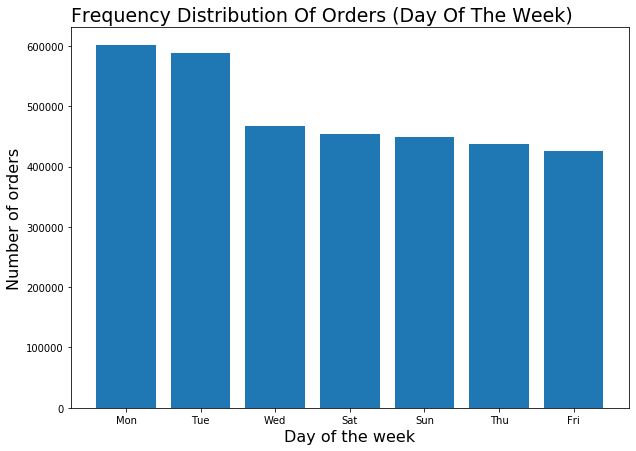

In [45]:
chart2 = orders['order_dow'].value_counts()
chart2.index = chart2.index.map({0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'})

plt.figure(figsize = (10,7))

plt.bar(chart2.index, chart2.values)
plt.xlabel('Day of the week', fontsize = 16)
plt.ylabel('Number of orders', fontsize = 16)
plt.title('Frequency Distribution Of Orders (Day Of The Week)', fontsize = 19, loc = 'left')

plt.show()

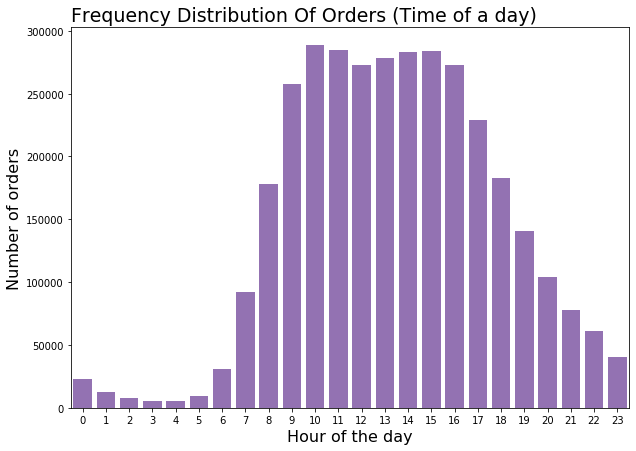

In [46]:
plt.figure(figsize = (10,7))

sns.barplot(orders['order_hour_of_day'].value_counts().index, orders['order_hour_of_day'].value_counts().values,
           color = color[4])
plt.xlabel('Hour of the day', fontsize = 16)
plt.ylabel('Number of orders', fontsize = 16)
plt.title('Frequency Distribution Of Orders (Time of a day)', fontsize = 19, loc = 'left')

plt.show()

According to graphs above, most of the orders come in the beginning of the week and most popular hours of the day are from 9 a.m. to 5 p.m.

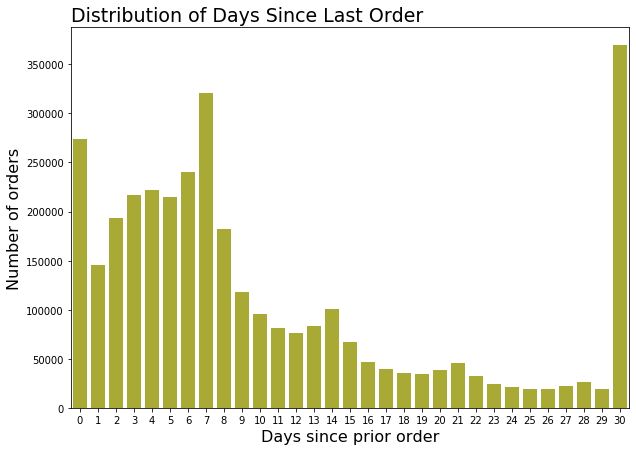

In [47]:
plt.figure(figsize = (10,7))

sns.barplot(orders['days_since_prior_order'].astype(int).value_counts().index, orders['days_since_prior_order'].value_counts().values,
           color = color[8])
plt.xlabel('Days since prior order', fontsize = 16)
plt.ylabel('Number of orders', fontsize = 16)
plt.title('Distribution of Days Since Last Order', fontsize = 19, loc = 'left')

plt.show()

It seems like the most popular cycles of orders are weekly or monthly. First bar, as mentioned in the beginning of the notebook, are first orders of customers and can be treated as new customers for a given dataset.

And finally, last but not least, lets take a look at average basket sizes across both data sets.

In [48]:
print(f'Sanity check: Merged df has {pd.concat([prior, train]).duplicated().sum()} duplicated values.')
chart3 = pd.concat([prior, train])
chart3 = chart3.groupby('order_id')['add_to_cart_order'].aggregate('max').to_frame().reset_index()
chart3 = chart3['add_to_cart_order'].value_counts()

chart3 = chart3.to_frame().reset_index()
chart3.columns = ['size', 'count']

Sanity check: Merged df has 0 duplicated values.


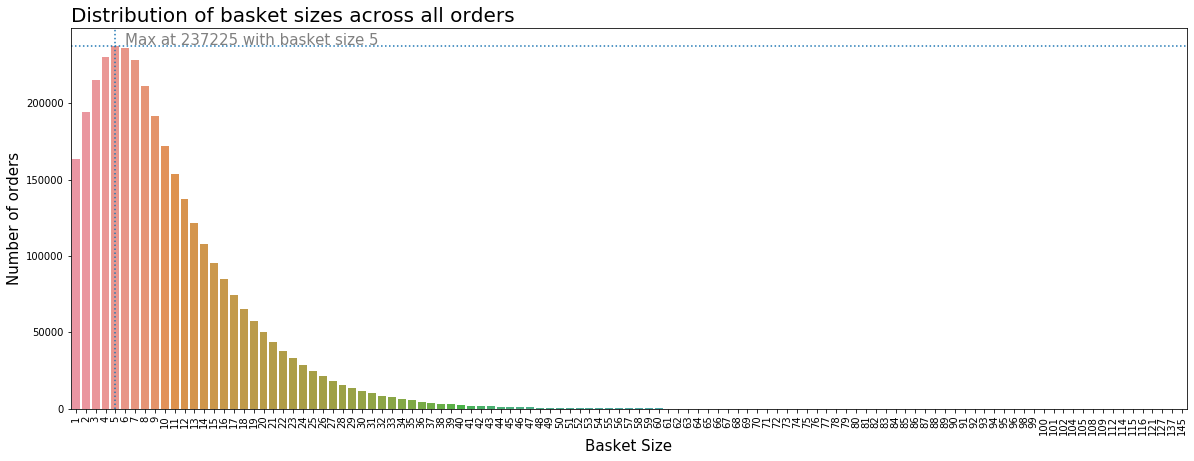

Percentage of reordered prodcuts across history: 59.01


In [49]:
plt.figure(figsize = (20,7))

sns.barplot(chart3['size'], chart3['count'])
plt.xlabel('Basket Size', fontsize = 15)
plt.ylabel('Number of orders', fontsize = 15)
plt.title('Distribution of basket sizes across all orders', fontsize = 20, loc = 'left')
plt.text(x = 5, y = chart3['count'].max() + 1000, s = f"Max at {chart3['count'].max()} with basket size 5", fontsize = 15, color = 'grey')
plt.xticks(rotation = 'vertical')
plt.axhline(chart3['count'].max(), linestyle = 'dotted')
plt.axvline(4, linestyle = 'dotted')

plt.show()

ratio = pd.concat([prior, train])
print(f"Percentage of reordered prodcuts across history: {np.round((ratio['reordered'].sum()/ratio.shape[0])*100,2)}")

As you can see above, most of the orders consists of 5-6 items with some order spreading all the way up to 145 items in it. However, it is evident that ordering more than 40 items is extremely rare and we can treat them as outliers. In addition, historically, only 59% of products were reordered. Due to this fact the competition was announced by Instacart, they wanted to know in what ways they could restrict the number of offered products in order to save costs on storing products that were/are a 'one-time' purchase. However, the 59% statistic is not robust because it captures first orders for each customer (206,209 of them) where no item has been previously purchased. To retrieve more accurate statistic we need to exclude first orders for each customer. As you can see below, by excluding first orders for each customer the percentage reordered went up. This is good news for Instacart since they now offer ~4% more products that will be repetitively purchased, however, it just made the classification problem a little harder. However, we cannot take out these orders from the set since they are part of purchase history.

In [51]:
first_orders = orders.loc[orders['order_number'] == 1, 'order_id'].values
first_excluded = ratio.loc[~ratio['order_id'].isin(first_orders), 'reordered']
print(f"Excluding first purchases, percentage of reordered prodcuts across history: {np.round((first_excluded.sum()/first_excluded.shape[0])*100,2)}")

Excluding first purchases, percentage of reordered prodcuts across history: 62.87


In [2]:
%load_ext watermark

%watermark -v -m -p numpy,pandas,sklearn,seaborn -g

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
CPython 3.7.6
IPython 7.12.0

numpy 1.18.1
pandas 1.0.1
sklearn 0.22.1
seaborn 0.10.0

compiler   : Clang 4.0.1 (tags/RELEASE_401/final)
system     : Darwin
release    : 19.5.0
machine    : x86_64
processor  : i386
CPU cores  : 8
interpreter: 64bit
Git hash   :
